In [106]:
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)



df = pd.read_csv("movies.csv")

In [61]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [107]:
# Using loop to check any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())                          
    print('{} - {}%'.format(col, round(pct_missing*100)))
     

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [108]:
# Print out data types for all the columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [109]:
#Change data type of columns

df["budget"] = df["budget"].fillna(0).astype(int) 
df["gross"] = df["gross"].fillna(0).astype(int) 
print(df.dtypes)   

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object


In [183]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [112]:
CompanyGrossSum = df.groupby(['company'], as_index=False).agg({'gross':np.sum})

CompanyGrossTop = CompanyGrossSum.sort_values('gross', ascending=False)[:15]

CompanyGrossTop = CompanyGrossTop['gross'].astype(int)

CompanyGrossTop


2319    56491421806
2281    52514188890
731     43008941346
1812    40493607415
2253    40257053857
2316    36327887792
1713    19883797684
1606    15065592411
887     11873612858
2232    11795832638
889     11635441081
1637     9230230105
2147     8373718838
1856     7886344526
1109     7443502667
Name: gross, dtype: int64

In [113]:
# Create correct released year column.

df['year_correct'] = df['released'].astype(str).str.split().str[2]
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [68]:
# Move column of 'year_correct' before 'released'


In [69]:
# Sorting values of 'gross' column.

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [70]:
# Display all the data

pd.set_option('display.max_rows', None)

In [71]:
# Drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3698                              Zentropa Entertainments
1175                                 Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [72]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


##### Task : Look at the gross revenue by company by year.

In [123]:
# Top 15 gross revenue ranking by company


CompanyGrossSum = df.groupby(['company'], as_index=False).agg({'gross':np.sum})

CompanyGrossTop = CompanyGrossSum.sort_values(['gross','company'], ascending=False)[:15]

CompanyGrossTop = CompanyGrossTop.astype({'gross':int, 'company':str})

CompanyGrossTop


,company,gross
2319,Warner Bros.,56491421806
2281,Universal Pictures,52514188890
731,Columbia Pictures,43008941346
1812,Paramount Pictures,40493607415
2253,Twentieth Century Fox,40257053857
2316,Walt Disney Pictures,36327887792
1713,New Line Cinema,19883797684
1606,Marvel Studios,15065592411
887,DreamWorks Animation,11873612858
2232,Touchstone Pictures,11795832638


In [128]:
# Find out every company's gross sales by year.

df.groupby(['company', 'year']).agg({'gross':np.sum})



gross
company                                            year            
"DIA" Productions GmbH & Co. KG                    2003    44350926
"Weathering With You" Film Partners                2019   193457467
.406 Production                                    1996       10580
1+2 Seisaku Iinkai                                 2000     1196218
10 West Studios                                    2010      814906
120 Films                                          2002     6479328
120dB Films                                        2009       26676
                                                   2016      368372
13 Productions                                     2000       25461
1492 Pictures                                      1996   129832389
                                                   1999    87423861
1818 Productions                                   1983    12232628
19 Entertainment                                   2003     4928883
1978 Films                                         2017    40656399
1984 Private Defense Contractors                   2014    58834384
1992 Number Four Limited Partnership               1995     4686937
2 Loop Films                                       2002      264349
2.0 Entertainment                                  2019   122810399
2.4.7. Films                                       2007    22783978
2003 Productions                                   2004    69424389
20th Century Studios                               2020   111105497
21 Laps Entertainment                              2014    41296320
                                                   2018    41142379
21st Century Film Corporation                      1989     3953745
                                                   1990     7658401
21st Century Films                                 1994     1702394
25th Hour Productions                              2002    23932055
26 Films                                           2009    20458873
2929 Productions                                   2007     7248490
                                                   2008    28705178
                                                   2014     5092129
2DUX²                                              2016      678150
                                                   2018   197744377
3 Arts Entertainment                               1996    60209334
                                                   1997    75812433
                                                   2001    71186502
                                                   2010      649626
                                                   2013     3909596
                                                   2014   161459297
                                                   2015    36606743
                                                   2019    22386555
3 Miles Apart Productions Ltd.                     1999     8408835
3311 Productions                                   2013     3114953
                                                   2017     5042014
360 Pictures                                       2007     9669758
391 Productions                                    1998     1960216
                                                   1999       92442
3B Productions                                     1999           0
                                                   2003      167999
3Mark Entertainment                                2001     4760014
4 1/2 Film                                         2006     1297260
4 Kids Entertainment                               1999   133949270
40 Acres & A Mule Filmworks                        1986     7137502
                                                   1989    37295445
                                                   1995    15403436
                                                   1999    34573780
                                                   2000    27728118
                                                  

In [129]:
# Ranking gross earning by company and year

CompanyGrossSum = df.groupby(['company', 'year'], as_index=False).agg({'gross':np.sum})

CompanyGrossTop = CompanyGrossSum.sort_values(['gross','company', 'year'], ascending=False)[:15]

CompanyGrossTop = CompanyGrossTop.astype({'gross':int, 'company':str})

CompanyGrossTop

,company,year,gross
4376,Walt Disney Pictures,2019,5773131804
2854,Marvel Studios,2018,4018631866
4272,Universal Pictures,2015,3834354888
4167,Twentieth Century Fox,2009,3793491246
4374,Walt Disney Pictures,2017,3789382071
3329,Paramount Pictures,2011,3565705182
4412,Warner Bros.,2010,3300479986
4413,Warner Bros.,2011,3223799224
4367,Walt Disney Pictures,2010,3104474158
3332,Paramount Pictures,2014,3071298586


###  Questtion: Dose Budget or Company has high correlation?



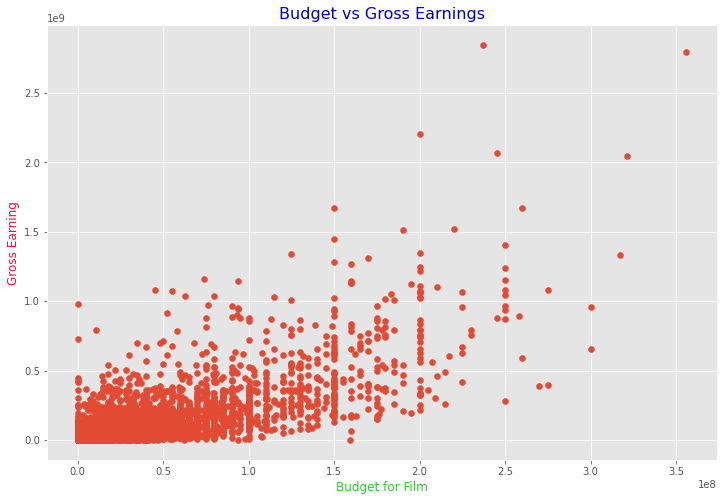

In [74]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title(label='Budget vs Gross Earnings', fontsize=16, color='mediumblue')

plt.xlabel('Budget for Film', color='limegreen')
plt.ylabel('Gross Earning', color='crimson')

plt.show()

In [75]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


<AxesSubplot:xlabel='budget', ylabel='gross'>

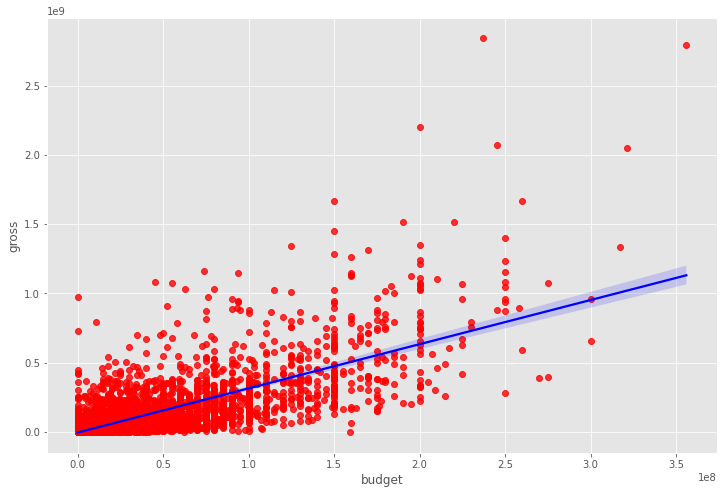

In [76]:
# Plot budget vs. Gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

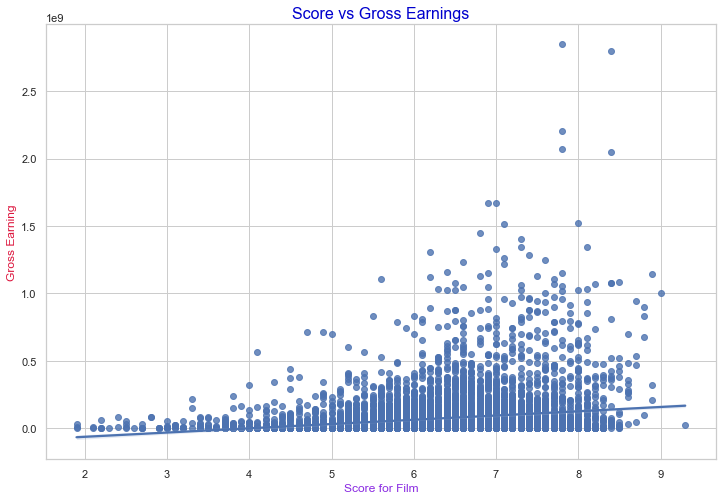

In [143]:
# Plot Score vs Gross Earning using seaborn

sns.regplot(x='score', y='gross', data=df)

plt.title(label='Score vs Gross Earnings', fontsize=16, color='mediumblue')

plt.xlabel('Score for Film', color='blueviolet')
plt.ylabel('Gross Earning', color='crimson')

plt.show()

In [77]:
# Let's start looking at correlation

In [78]:
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


In [79]:
# High correlation between budget vs gross

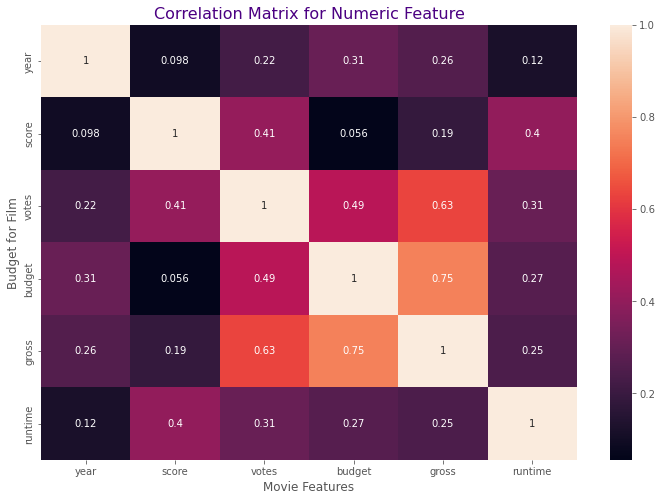

In [80]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Feature', fontsize=16, color='indigo')

plt.xlabel('Movie Features')

plt.ylabel('Budget for Film')

plt.show()

In [81]:
# Looks at company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [102]:
# Change those coloumns with 'object' data type into numerical value (cat.codes)

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()
        
        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,31
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,41
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,19
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,37
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,40


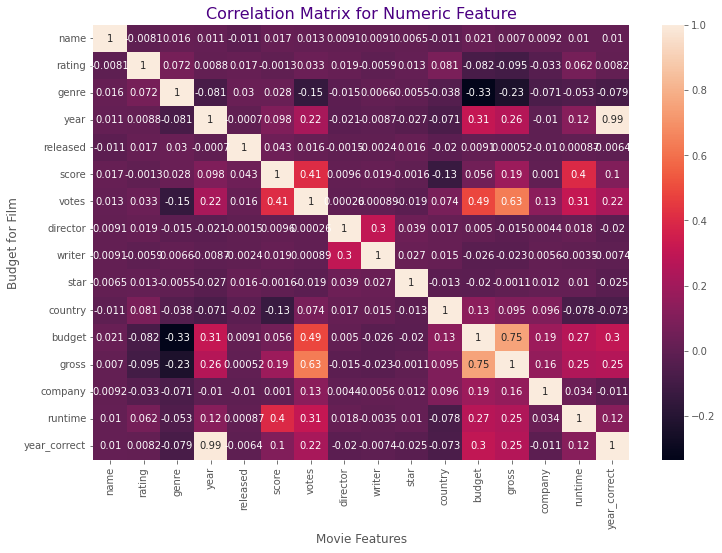

In [83]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Feature', fontsize=16, color='indigo')

plt.xlabel('Movie Features')

plt.ylabel('Budget for Film')

plt.show()

In [84]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.010392,0.010071
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.062145,0.008230
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052711,-0.078972
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.120811,0.990063
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.000868,-0.006411
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.399451,0.103330
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.632834,0.133204,0.309212,0.218468
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017624,-0.019692
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.003511,-0.007400
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.010174,-0.025231


In [85]:
# Pivot the df.numerized.corr of the index label.

correlation_matrix = df_numerized.corr()

corr_pairs = correlation_matrix.unstack()

corr_pairs

name          name            1.000000
              rating         -0.008069
              genre           0.016355
              year            0.011453
              released       -0.011311
              score           0.017097
              votes           0.013088
              director        0.009079
              writer          0.009081
              star            0.006472
              country        -0.010737
              budget          0.020548
              gross           0.006989
              company         0.009211
              runtime         0.010392
              year_correct    0.010071
rating        name           -0.008069
              rating          1.000000
              genre           0.072423
              year            0.008779
              released        0.016613
              score          -0.001314
              votes           0.033225
              director        0.019483
              writer         -0.005921
              star       

In [86]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre         budget         -0.334021
budget        genre          -0.334021
genre         gross          -0.234297
gross         genre          -0.234297
votes         genre          -0.145307
genre         votes          -0.145307
score         country        -0.133348
country       score          -0.133348
rating        gross          -0.095450
gross         rating         -0.095450
rating        budget         -0.081939
budget        rating         -0.081939
year          genre          -0.081261
genre         year           -0.081261
year_correct  genre          -0.078972
genre         year_correct   -0.078972
country       runtime        -0.078412
runtime       country        -0.078412
year_correct  country        -0.072682
country       year_correct   -0.072682
company       genre          -0.071067
genre         company        -0.071067
year          country        -0.070938
country       year           -0.070938
runtime       genre          -0.052711
genre         runtime    

In [87]:
# Find out the pairs that have correlation greater than 0.5

high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes         gross           0.632834
gross         votes           0.632834
              budget          0.750157
budget        gross           0.750157
year_correct  year            0.990063
year          year_correct    0.990063
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
dtype: float64

### Conclusion: Votes and budget have the highest correlation to gross earning
###                      Company has low correlation.

/Users/tinasimac/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 96.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tinasimac/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 85.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tinasimac/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 45.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tinasimac/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 88.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tinasimac/opt/anaconda3/lib/pytho

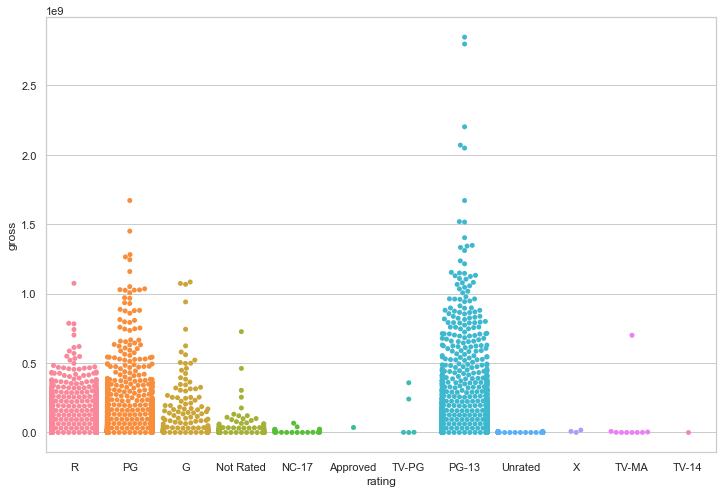

In [140]:

sns.set(style="whitegrid")

ax = sns.swarmplot(x="rating", y="gross", data=df)

plt.show()

In [145]:
# Top 15 highest-grossing movies.

MovieGrossSum = df.groupby(['name', 'year'], as_index=False).agg({'gross':np.sum})

MovieGrossTop = MovieGrossSum.sort_values(['gross','name', 'year'], ascending=False)[:15]

MovieGrossTop = MovieGrossTop.astype({'gross':int, 'name':str})

MovieGrossTop


,name,year,gross
540,Avatar,2009,2847246203
542,Avengers: Endgame,2019,2797501328
7042,Titanic,1997,2201647264
5256,Star Wars: Episode VII - The Force Awakens,2015,2069521700
543,Avengers: Infinity War,2018,2048359754
6329,The Lion King,2019,1670727580
3030,Jurassic World,2015,1670516444
5622,The Avengers,2012,1518815515
2184,Furious 7,2015,1515341399
2170,Frozen II,2019,1450026933


In [ ]:
TopMovieBudget = TopMovieBudget[['budget', 'gross']].astype(int)

In [181]:
# Top 15 highest-budget movies.

MovieBudgetSum = df.groupby(['name', 'year'], as_index=False).agg({'budget':np.sum, 'gross':np.sum})


TopMovieBudget = MovieBudgetSum.sort_values(['budget', 'gross', 'name', 'year'], ascending=False)[:15]


TopMovieBudget = TopMovieBudget.astype({'budget':int, 'gross':int, 'name':str})


TopMovieBudget

,name,year,budget,gross
542,Avengers: Endgame,2019,356000000,2797501328
543,Avengers: Infinity War,2018,321000000,2048359754
5257,Star Wars: Episode VIII - The Last Jedi,2017,317000000,1332698830
4347,Pirates of the Caribbean: at World's End,2007,300000000,960996492
3045,Justice League,2017,300000000,657926987
5253,Star Wars: Episode IX - The Rise of Skywalker,2019,275000000,1078232589
5123,Solo: A Star Wars Story,2018,275000000,392924807
5399,Superman Returns,2006,270000000,391081192
6329,The Lion King,2019,260000000,1670727580
5485,Tangled,2010,260000000,592462816


In [182]:
# Top 15 highest-votes movies.

MovieVotesSum = df.groupby(['name', 'year', 'score'], as_index=False).agg({'votes':np.sum, 'gross':np.sum})

TopMovieVotes = MovieVotesSum.sort_values(['votes', 'gross', 'name', 'year', 'score'], ascending=False)[:15]

TopMovieVotes = TopMovieVotes.astype({'votes':int, 'gross':int, 'name':str})

TopMovieVotes

,name,year,score,votes,gross
5846,The Dark Knight,2008,9.0,2400000,1005973645
6724,The Shawshank Redemption,1994,9.3,2400000,28817291
2815,Inception,2010,8.8,2100000,836836967
2102,Forrest Gump,1994,8.8,1900000,678226133
4481,Pulp Fiction,1994,8.9,1900000,213928762
1998,Fight Club,1999,8.8,1900000,101209702
6355,The Lord of the Rings: The Return of the King,2003,8.9,1700000,1146030912
6354,The Lord of the Rings: The Fellowship of the Ring,2001,8.8,1700000,897690072
6411,The Matrix,1999,8.7,1700000,466364845
5847,The Dark Knight Rises,2012,8.4,1600000,1081142612
